<a href="https://colab.research.google.com/github/srkiyengar/PycharmProjects/blob/master/oreo_pybullet_habitat_Sept25_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%bash

DIRECTORY=/content/oreo-pybullet
if [ -d "$DIRECTORY" ]; then
  rm -r /content/oreo-pybullet
fi
mkdir /content/oreo-pybullet
cp /content/drive/My\ Drive/Colab_Notebooks/Oreo-habitat-integration/* /content/oreo-pybullet/  -r

In [ ]:
!curl -L https://raw.githubusercontent.com/facebookresearch/habitat-sim/master/examples/colab_utils/colab_install.sh | NIGHTLY=false bash -s
!wget -c http://dl.fbaipublicfiles.com/habitat/mp3d_example.zip && unzip -o mp3d_example.zip -d /content/habitat-sim/data/scene_datasets/mp3d/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2658  100  2658    0     0  13989      0 --:--:-- --:--:-- --:--:-- 13989
--2021-10-04 18:33:41--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2021-10-04 18:33:41--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
pip install 'pybullet==2.8.7'

     |████████████████████████████████| 100.7 MB 11 kB/s 


In [ ]:
import sys
_ = (sys.path.append("/content/oreo-pybullet"))

In [ ]:
import os
if "google.colab" in sys.modules:
    # This tells imageio to use the system FFMPEG that has hardware acceleration.
    os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

In [ ]:
import agent_oreo as ao
import saliency as s
import cv2
pybullet_sim = ao.OreoPyBulletSim("/content/oreo-pybullet/")

INFO:LOG_LEVEL: DEBUG
INFO:There are 16 links in file

DEBUG:base_joint 0
DEBUG:com frame (posn (global) & orn (global)) (0.0, 0.0, 0.0) (0.26947353370204224, -0.1483647897014979, -0.336452277174072)
DEBUG:inertial offset (posn (link frame), orn (link frame)) (0.0, 0.0, 0.0) (0.2694735337020423, -0.1483647897014979, -0.33645227717407206)
DEBUG:link frame (posn (global), orn (global)) (0.0, 0.0, 0.0) (0.0, -0.0, 0.0)
DEBUG:type 4
DEBUG:axis (0.0, 0.0, 0.0)
DEBUG:collision (posn (COM frame), orn(COM frame)) (0.0, 0.0, 0.0) (-0.2110668264094377, 0.22426388413035764, 0.29244941472167946)
DEBUG:visual (posn (link frame), orn(link frame)) (0.0, 0.0, 0.0) (0.0, -0.0, 0.0)


DEBUG:neck_joint 1
DEBUG:com frame (posn (global) & orn (global)) (0.03609000000000001, -0.00028000000000000507, 0.07360000000000004) (0.013334272492713626, -0.009866778134608222, 0.02516708744634716)
DEBUG:inertial offset (posn (link frame), orn (link frame)) (0.00028, 0.00039, 0.07587) (0.013334272492713562, -0.009866778

oreo_sim constructed


DEBUG:collision (posn (COM frame), orn(COM frame)) (0.0, 0.0, 0.0) (2.2307215378942316e-10, -5.083190692836738e-07, -0.0004388427524149779)
DEBUG:visual (posn (link frame), orn(link frame)) (0.00613, 0.0, 0.0) (0.0, -0.0, 0.0)


DEBUG:dogbone_joint_far_left 8
DEBUG:com frame (posn (global) & orn (global)) (0.10635431230096275, 0.042828496985593406, 0.22114011495959104) (-0.00018403215135369834, 0.25917999772986283, -5.1403272343572216e-05)
DEBUG:inertial offset (posn (link frame), orn (link frame)) (0.03025, 0.0, 0.0) (0.0, -0.0, 0.0)
DEBUG:link frame (posn (global), orn (global)) (0.07711464911699295, 0.04282999783754349, 0.22889283299446106) (-0.00018403216069739608, 0.2591799959642588, -5.140327524362407e-05)
DEBUG:type 2
DEBUG:axis (0.0, 0.0, 0.0)
DEBUG:collision (posn (COM frame), orn(COM frame)) (0.0, 0.0, 0.0) (0.0, -0.0, 0.0)
DEBUG:visual (posn (link frame), orn(link frame)) (0.03025, 0.0, 0.0) (0.0, -0.0, 0.0)


DEBUG:dogbone_joint_mid_left 9
DEBUG:com frame (posn (global) & o

In [ ]:
from google.colab.patches import cv2_imshow
import quaternion
import numpy as np

scene ="/content/habitat-sim/data/scene_datasets/habitat-test-scenes/van-gogh-room.glb"
result_folder = "/content/oreo-pybullet/saliency"
oreo_in_habitat = ao.agent_oreo(scene, result_folder, depth_camera=False, loc_depth_cam = 'c', foveation=False)

I1004 18:40:54.100669 78 simulator.py:221] Loaded navmesh /content/habitat-sim/data/scene_datasets/habitat-test-scenes/van-gogh-room.navmesh
INFO:I1004 18:40:54.100669 78 simulator.py:221] Loaded navmesh /content/habitat-sim/data/scene_datasets/habitat-test-scenes/van-gogh-room.navmesh


Agent rotation quaternion(1, 0, 2.45858027483337e-05, 0) Agent position [ 3.5310855   0.17669876 -0.34353667]


In [ ]:
from google.colab import widgets
import ipywidgets
from IPython.display import display, clear_output, Image


action_name = ['backward', 'forward', 'left', 'right', 'up', 'down', 'cw', 'ccw','start', 'quit', 'empty1', 'Last Position' ]
total_actions = len(action_name)
print (total_actions)


# register function to be called when the button is clicked

def on_button_clicked(selection):
  # Display the message within the output widget.
  with output:
    clear_output()
    take_action(selection)
    

12


In [ ]:
# Take action based on input

delta_move = 0.1
delta_ang_ccw  = quaternion.from_rotation_vector([0.0, 2*np.pi/30,0.0])
delta_ang_cw = quaternion.from_rotation_vector([0.0, -2*np.pi/30, 0.0])
ang_quat = quaternion.from_rotation_vector([0.0, 0.0, 0.0])

def take_action(selected_key):
  print(f'Last Action {selected_key.description}')
  if selected_key.description == 'backward':
    oreo_in_habitat.move_and_rotate_agent(ang_quat, [0.0, 0.0, delta_move])
  elif selected_key.description == 'forward':
    oreo_in_habitat.move_and_rotate_agent(ang_quat, [0.0, 0.0, -delta_move])
  elif selected_key.description == 'left':
    oreo_in_habitat.move_and_rotate_agent(ang_quat, [-delta_move, 0.0, 0.0])
  elif selected_key.description == 'right':
    oreo_in_habitat.move_and_rotate_agent(ang_quat, [delta_move, 0.0, 0.0])
  elif selected_key.description == 'up':
    oreo_in_habitat.move_and_rotate_agent(ang_quat, [0.0, delta_move, 0.0])
  elif selected_key.description == 'ccw':
    oreo_in_habitat.move_and_rotate_agent(delta_ang_ccw, [0.0, 0.0, 0.0])  
  elif selected_key.description == 'cw':
    oreo_in_habitat.move_and_rotate_agent(delta_ang_cw, [0.0, 0.0, 0.0])
  else:
    pass
  cv2_imshow(oreo_in_habitat.my_images[0][..., 0:3][..., ::-1])

# create output widget
output = ipywidgets.widgets.Output()

# create a list of buttons, one for each star sign
button_list = []
for i in range(0, total_actions):
  button = ipywidgets.widgets.Button(description = action_name[i])
  button.on_click(on_button_clicked)
  button_list.append(button) 

print('\nMove Oreo\'s view by clicking one of the buttons\n')

# arrange the sign images and buttons into two rows
grid = widgets.Grid(1, 6, header_row=True, header_column=True) 
for (row, col) in grid:
  index = row*6+col
  display(button_list[index])
for (row, col) in grid:
  index = row*6+col
  display(button_list[index+6])

# display output

display(output)


Move Oreo's view by clicking one of the buttons



,,,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='backward', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='forward', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='left', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='right', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='up', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='down', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='cw', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='ccw', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='start', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='quit', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='empty1', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Last Position', style=ButtonStyle())

<IPython.core.display.Javascript object>

Output()

Process for saliency. This object will be initially devoid of saliency map and this has to added to the object after getting the saliency map from Deep Gaze II.

In [ ]:
if start_image_file is not None:
  my_sal_object = s.process_image(start_image_file, my_block = 16, total_points = 10, pixel_max = 150)
  cv2_imshow(my_sal_object.imageL)
else:
  print ("Error: The start image file does not exist")

In [ ]:
img = my_images[0]

In [ ]:
oreo_in_habitat.save_view()

Saved Image file/content/oreo-pybullet/results/apartment_1--0


1

In [ ]:
from scipy.ndimage import zoom
from scipy.special import logsumexp   #changed from scipy.misc to scipy.special
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [ ]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
# load precomputed log density over a 1024x1024 image
centerbias_template = np.load('/content/oreo-pybullet/centerbias.npy')

# rescale to match image size
centerbias = zoom(centerbias_template, (img.shape[0]/1024, img.shape[1]/1024), order=0, mode='nearest')

# renormalize log density
centerbias -= logsumexp(centerbias)

image_data = img[np.newaxis, :, :, :]  # BHWC, three channels (RGB)
centerbias_data = centerbias[np.newaxis, :, :, np.newaxis]  # BHWC, 1 channel (log density)

In [ ]:
tf.get_default_graph()
tf.reset_default_graph()

In [ ]:
check_point = '/content/oreo-pybullet/DeepGazeII.ckpt'  # DeepGaze II
#check_point = 'ICF.ckpt'  # ICF
new_saver = tf.train.import_meta_graph('{}.meta'.format(check_point))

input_tensor = tf.get_collection('input_tensor')[0]
centerbias_tensor = tf.get_collection('centerbias_tensor')[0]
log_density = tf.get_collection('log_density')[0]
log_density_wo_centerbias = tf.get_collection('log_density_wo_centerbias')[0]

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


In [ ]:
with tf.Session() as sess:
    
    new_saver.restore(sess, check_point)
    
    log_density_prediction = sess.run(log_density, {
        input_tensor: image_data,
        centerbias_tensor: centerbias_data,
    })

INFO:Restoring parameters from /content/oreo-pybullet/DeepGazeII.ckpt


In [ ]:
newvalue = np.exp(log_density_prediction[0,:,:,0])
newvalue.shape

(512, 512)

In [ ]:
import pickle
just_filename = oreo_in_habitat.get_current_saved_image_filename()
fname = just_filename + ".saliency"
with open(fname,"wb") as f:
  pickle.dump(newvalue,f)


DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f4a42b76e10>
DEBUG:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f4a42b76e10> on colorbar
DEBUG:Setting pcolormesh
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved


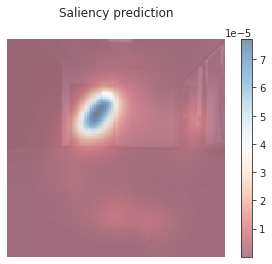

In [ ]:
plt.gca().imshow(img, alpha=0.2)
m = plt.gca().matshow((newvalue), alpha=0.5, cmap=plt.cm.RdBu)
plt.colorbar(m)
plt.title('Saliency prediction')
plt.axis('off');

In [ ]:
with open(fname, "rb") as f:
  sdata = pickle.load(f)

DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f4a42b85c50>
DEBUG:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f4a42b85c50> on colorbar
DEBUG:Setting pcolormesh
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved
DEBUG:top of axes not in the figure, so title not moved


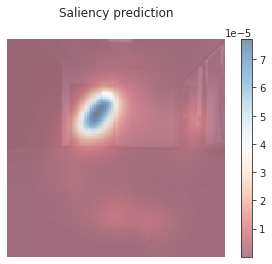

In [ ]:
plt.gca().imshow(img, alpha=0.2)
m = plt.gca().matshow((sdata), alpha=0.5, cmap=plt.cm.RdBu)
plt.colorbar(m)
plt.title('Saliency prediction')
plt.axis('off');

In [ ]:
cp -r /content/oreo-pybullet/results  /content/drive/My\ Drive/Colab_Notebooks/Oreo-habitat-integration/

In [ ]:
oreo_in_habitat.sim.close()

DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fed82457390>
DEBUG:Using auto colorbar locator on colorbar
DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fed82457390>
DEBUG:Setting pcolormesh
DEBUG:not adjusting title pos because a title was already placed manually: 1.050000
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting


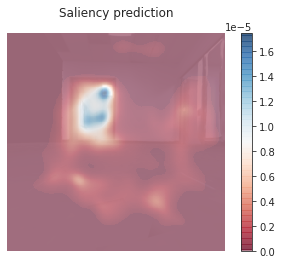

In [ ]:
plt.gca().imshow(img, alpha=0.2)
m = plt.gca().matshow((newvalue), alpha=0.5, cmap=plt.cm.RdBu)
plt.colorbar(m)
plt.title('Saliency prediction')
plt.axis('off');

In [ ]:
newvalue = np.exp(log_density_prediction[0,:,:,0])
newvalue[newvalue  < 0.1e-5] = 0

DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fed82eae0b8>
DEBUG:Using auto colorbar locator on colorbar
DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fed82eae0b8>
DEBUG:Setting pcolormesh
DEBUG:not adjusting title pos because a title was already placed manually: 1.050000
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting


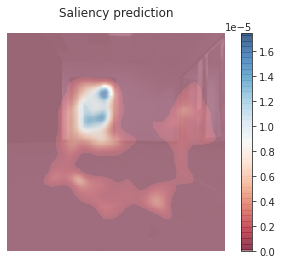

In [ ]:
plt.gca().imshow(img, alpha=0.2)
m = plt.gca().matshow((newvalue), alpha=0.5, cmap=plt.cm.RdBu)
plt.colorbar(m)
plt.title('Saliency prediction')
plt.axis('off');

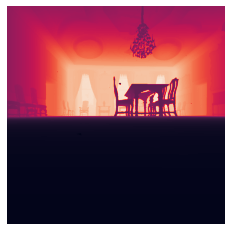

In [ ]:
plt.imshow(depth_image)
plt.axis('off');

In [ ]:
oreo_in_habitat.sim.close()

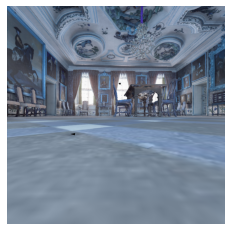

In [ ]:
plt.imshow(righteye_image)
plt.axis('off');

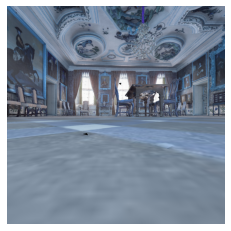

In [ ]:
plt.imshow(lefteye_image)
plt.axis('off');

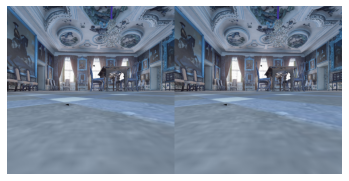

In [ ]:
plt.imshow(stereo_image)
plt.axis('off');

In [ ]:
import pickle
my_img = log_density_prediction[0,:,:,0]
my_img.shape
with open("/content/oreo-pybullet/prediction_pickle_file","wb") as f:
  pickle.dump(my_img,f)

In [ ]:
import quaternion
d = quaternion.from_rotation_vector([0.0,(-2.0*np.pi/3),0.0])
my_agent = the_sim.get_agent(agent_id)
oa.relative_move_and_rotate_agent(my_agent,d)

In [ ]:
stereo_image, depth_image = oa.get_sensor_observations(the_sim)
lefteye_image = stereo_image[:,0:1024,:]
righteye_image = stereo_image[:,1024:,:]

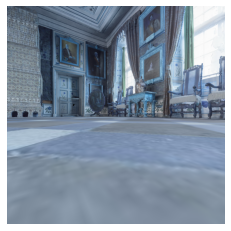

In [ ]:
img = lefteye_image
plt.imshow(lefteye_image)
plt.axis('off');

In [ ]:
# load precomputed log density over a 1024x1024 image
centerbias_template = np.load('/content/oreo-pybullet/centerbias.npy') 

# rescale to match image size
centerbias = zoom(centerbias_template, (img.shape[0]/1024, img.shape[1]/1024), order=0, mode='nearest')

# renormalize log density
centerbias -= logsumexp(centerbias)

image_data = img[np.newaxis, :, :, :]  # BHWC, three channels (RGB)
centerbias_data = centerbias[np.newaxis, :, :, np.newaxis]  # BHWC, 1 channel (log density)


check_point = '/content/oreo-pybullet/DeepGazeII.ckpt'  # DeepGaze II
#check_point = 'ICF.ckpt'  # ICF
new_saver = tf.train.import_meta_graph('{}.meta'.format(check_point))

input_tensor = tf.get_collection('input_tensor')[0]
centerbias_tensor = tf.get_collection('centerbias_tensor')[0]
log_density = tf.get_collection('log_density')[0]
log_density_wo_centerbias = tf.get_collection('log_density_wo_centerbias')[0]
with tf.Session() as sess:
    
    new_saver.restore(sess, check_point)
    
    log_density_prediction = sess.run(log_density, {
        input_tensor: image_data,
        centerbias_tensor: centerbias_data,
    })

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:Restoring parameters from /content/oreo-pybullet/DeepGazeII.ckpt


DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7ff12d1ba438>
DEBUG:Using auto colorbar locator on colorbar
DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7ff12d1ba438>
DEBUG:Setting pcolormesh
DEBUG:not adjusting title pos because a title was already placed manually: 1.050000
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting


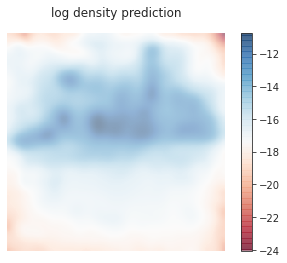

In [ ]:
m = plt.gca().matshow((log_density_prediction[0, :, :, 0]), alpha=0.5, cmap=plt.cm.RdBu)
plt.colorbar(m)
plt.title('log density prediction')
plt.axis('off');

In [ ]:
plt.imshow(depth_image)
plt.axis('off');

NameError: ignored

In [ ]:
d = quaternion.from_rotation_vector([0.0,(-2.0*np.pi/3),0.0])
my_agent = the_sim.get_agent(agent_id)
oa.relative_move_and_rotate_agent(my_agent,d)

In [ ]:
stereo_image, depth_image = oa.get_sensor_observations(the_sim)
lefteye_image = stereo_image[:,0:1024,:]
righteye_image = stereo_image[:,1024:,:]

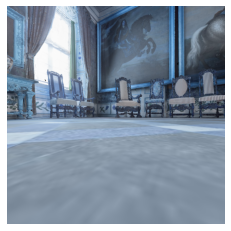

In [ ]:
img = lefteye_image
plt.imshow(lefteye_image)
plt.axis('off');

In [ ]:


image_data = img[np.newaxis, :, :, :]  # BHWC, three channels (RGB)

check_point = '/content/oreo-pybullet/DeepGazeII.ckpt'  # DeepGaze II
#check_point = 'ICF.ckpt'  # ICF
new_saver = tf.train.import_meta_graph('{}.meta'.format(check_point))

input_tensor = tf.get_collection('input_tensor')[0]
centerbias_tensor = tf.get_collection('centerbias_tensor')[0]
log_density = tf.get_collection('log_density')[0]
log_density_wo_centerbias = tf.get_collection('log_density_wo_centerbias')[0]
with tf.Session() as sess:
    
    new_saver.restore(sess, check_point)
    
    log_density_prediction = sess.run(log_density, {
        input_tensor: image_data,
        centerbias_tensor: centerbias_data,
    })

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:Restoring parameters from /content/oreo-pybullet/DeepGazeII.ckpt


DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f712c2cd390>
DEBUG:Using auto colorbar locator on colorbar
DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f712c2cd390>
DEBUG:Setting pcolormesh
DEBUG:not adjusting title pos because a title was already placed manually: 1.050000
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting
DEBUG:title position was updated manually, not adjusting


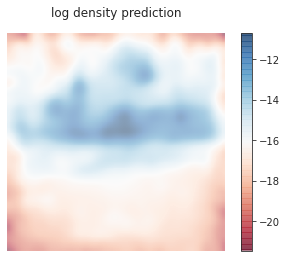

In [ ]:
m = plt.gca().matshow((log_density_prediction[0, :, :, 0]), alpha=0.5, cmap=plt.cm.RdBu)
plt.colorbar(m)
plt.title('log density prediction')
plt.axis('off');

In [ ]:
log

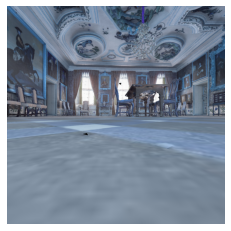

In [ ]:
d = quaternion.from_rotation_vector([0.0,(-2.0*np.pi/3),0.0])
my_agent = the_sim.get_agent(agent_id)
oa.relative_move_and_rotate_agent(my_agent,d)
stereo_image, depth_image = oa.get_sensor_observations(the_sim)
lefteye_image = stereo_image[:,0:1024,:]
righteye_image = stereo_image[:,1024:,:]
img = lefteye_image
plt.imshow(lefteye_image)
plt.axis('off');
